In [2]:
%cd /content
!git clone https://github.com/megvii-research/NAFNet

/content
Cloning into 'NAFNet'...
remote: Enumerating objects: 521, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 521 (delta 180), reused 142 (delta 142), pack-reused 296
Receiving objects: 100% (521/521), 16.19 MiB | 28.93 MiB/s, done.
Resolving deltas: 100% (277/277), done.


In [3]:
%cd /content/NAFNet

!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

/content/NAFNet
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/us

In [4]:
%cd /content/NAFNet

import gdown
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os
from google.colab import files
import shutil
import glob

/content/NAFNet


Downloading the three different components of the NAFNet Model

In [5]:
%cd /content/NAFNet

# Denoise
if not os.path.exists("./experiments/pretrained_models/NAFNet-SIDD-width64.pth"):
  gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

# Deblur
if not os.path.exists("./experiments/pretrained_models/NAFNet-REDS-width64.pth"):
  gdown.download('https://drive.google.com/uc?id=14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X', "./experiments/pretrained_models/", quiet=False)

# Super Resolution
if not os.path.exists("./experiments/pretrained_models/NAFSSR-L_4x.pth"):
  gdown.download('https://drive.google.com/uc?id=1TIdQhPtBrZb2wrBdAp9l8NHINLeExOwb', "./experiments/pretrained_models/", quiet=False)


/content/NAFNet


Downloading...
From (original): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR
From (redirected): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR&confirm=t&uuid=7c474e21-7818-491e-9a1d-7264876564b1
To: /content/NAFNet/experiments/pretrained_models/NAFNet-SIDD-width64.pth
100%|██████████| 464M/464M [00:11<00:00, 40.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X
From (redirected): https://drive.google.com/uc?id=14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X&confirm=t&uuid=a7f96f07-1c83-4d0f-a0b1-993313a60973
To: /content/NAFNet/experiments/pretrained_models/NAFNet-REDS-width64.pth
100%|██████████| 272M/272M [00:08<00:00, 31.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1TIdQhPtBrZb2wrBdAp9l8NHINLeExOwb
From (redirected): https://drive.google.com/uc?id=1TIdQhPtBrZb2wrBdAp9l8NHINLeExOwb&confirm=t&uuid=cd0adeec-128e-4309-a3b5-e4fb133c64fb
To: /content/NAFNet/experiments/pretrained_models/N

Downloading images required for demonstration

In [6]:
%cd /content/NAFNet

# Denoise
if not os.path.exists("./demo_input/noisy-demo-0.png"):
  gdown.download('https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm', "demo_input/", quiet=False)

# Deblur
if not os.path.exists("./demo_input/blurry-reds-0.jpg"):
  gdown.download('https://drive.google.com/uc?id=1kWjrGsAvh4gOA_gn7rB9vnnQVfRINwEn', "demo_input/", quiet=False)

# Super Resolution
if not os.path.exists("./demo_input/Middlebury_lr_x4_sword2_l.png"):
  gdown.download('https://drive.google.com/uc?id=15MLvll3frPC2ICjTUnXvnLe58D_dONXc', "demo_input/", quiet=False)
if not os.path.exists("./demo_input/Middlebury_lr_x4_sword2_r.png"):
  gdown.download('https://drive.google.com/uc?id=1tedRtTen7LFHXsaC4ddwwg8ZkbEHPL0b', "demo_input/", quiet=False)

/content/NAFNet


Downloading...
From: https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm
To: /content/NAFNet/demo_input/noisy-demo-0.png
100%|██████████| 171k/171k [00:00<00:00, 59.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kWjrGsAvh4gOA_gn7rB9vnnQVfRINwEn
To: /content/NAFNet/demo_input/blurry-reds-0.jpg
100%|██████████| 48.9k/48.9k [00:00<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15MLvll3frPC2ICjTUnXvnLe58D_dONXc
To: /content/NAFNet/demo_input/Middlebury_lr_x4_sword2_l.png
100%|██████████| 32.3k/32.3k [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tedRtTen7LFHXsaC4ddwwg8ZkbEHPL0b
To: /content/NAFNet/demo_input/Middlebury_lr_x4_sword2_r.png
100%|██████████| 32.3k/32.3k [00:00<00:00, 45.1MB/s]


Uploading the demo images to the required folders

In [7]:
%cd /content/NAFNet/

# Denoise
denoise_input_fldr = 'upload/denoise_input'
denoise_output_fldr = 'upload/denoise_output'

if os.path.isdir (denoise_input_fldr):       # Checks if the folder exists, and recursively deletes it
   shutil.rmtree (denoise_input_fldr)
if os.path.isdir (denoise_output_fldr):
   shutil.rmtree (denoise_output_fldr)
os.makedirs (denoise_input_fldr)
os.makedirs (denoise_output_fldr)

# Uploading images
folder = files.upload()
for file in folder.keys():
  destination = os.path.join (denoise_input_fldr, file)
  print (f'move {file} to {destination}')
  shutil.move (file, destination)

/content/NAFNet


Saving denoise2.jpeg to denoise2.jpeg
Saving denoise1.jpg to denoise1.jpg
move denoise2.jpeg to upload/denoise_input/denoise2.jpeg
move denoise1.jpg to upload/denoise_input/denoise1.jpg


In [8]:
%cd /content/NAFNet/

# Deblur
deblur_input_fldr = 'upload/deblur_input'
deblur_output_fldr = 'upload/deblur_output'

if os.path.isdir (deblur_input_fldr):       # Checks if the folder exists, and recursively deletes it
   shutil.rmtree (deblur_input_fldr)
if os.path.isdir (deblur_output_fldr):
   shutil.rmtree (deblur_output_fldr)
os.makedirs (deblur_input_fldr)
os.makedirs (deblur_output_fldr)

# Uploading images
folder = files.upload()
for file in folder.keys():
  destination = os.path.join (deblur_input_fldr, file)
  shutil.move (file, destination)

/content/NAFNet


Saving blur.jpg to blur.jpg


In [9]:
%cd /content/NAFNet

# Super Resolution
reso_input_fldr = 'upload/reso_input'
reso_output_fldr = 'upload/reso_output'

if os.path.isdir (reso_input_fldr):
  shutil.rmtree (reso_input_fldr)
if os.path.isdir (reso_output_fldr):
  shutil.rmtree (reso_output_fldr)
os.makedirs (reso_input_fldr)
os.makedirs (reso_output_fldr)

folder = files.upload()
for image in folder.keys():
  dest = os.path.join (reso_input_fldr, image)
  print (f'move {image} to {dest}')
  shutil.move (image, dest)

/content/NAFNet


Saving super_reso.jpeg to super_reso.jpeg
move super_reso.jpeg to upload/reso_input/super_reso.jpeg


Image Utility Functions

In [10]:
def img_read (img_path):
  img = cv2.imread (img_path)
  img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
  return img

def img_2tensor (img, bgr2rgb = False, float32 = True):
  image = img.astype (np.float32) / 255.
  return _img2tensor (img, bgr2rgb = bgr2rgb, float32 = float32)

def display_img (img1, img2):
  fig = plt.figure (figsize = (25, 10))
  ax1 = fig.add_subplot (1, 2, 1)
  plt.title ('Input image', fontsize = 20)
  ax1.axis ('off')
  ax2 = fig.add_subplot (1, 2, 2)
  plt.title ('NAFNet output', fontsize = 20)
  ax2.axis ('off')
  ax1.imshow (img1)
  ax2.imshow (img2)

def single_image_infer (model, img, save_path):
  model.feed_data (data = {'lq': img.unsqueeze (dim = 0)})

  if model.opt['val'].get ('grids', False):
    model.grids()
  model.test()
  if model.opt['val'].get ('grids', False):
    model.grids_inverse()

  visual = model.get_current_visuals()
  sr_img = tensor2img ([visual['result']])
  imwrite (sr_img, save_path)

def sr_display (LR_left, LR_right, SR_left, SR_right):
  height, width = SR_left.shape[:2]
  LR_left = cv2.resize (LR_left, (width, height), interpolation = cv2.INTER_CUBIC)
  LR_right = cv2.resize (LR_right, (width, height), interpolation = cv2.INTER_CUBIC)
  fig = plt.figure (figsize = (width//40, height//40))
  ax1 = fig.add_subplot (2, 2, 1)
  plt.title ('Input Image (Left)', fontsize = 20)
  ax1.axis ('off')
  ax2 = fig.add_subplot (2, 2, 2)
  plt.title ('NAFSSR Output (Left)', fontsize = 20)
  ax2.axis ('off')
  ax1.imshow (LR_left)
  ax2.imshow (SR_left)

  ax3 = fig.add_subplot (2, 2, 3)
  plt.title ('Input Image (Right)', fontsize = 20)
  ax3.axis ('off')
  ax4 = fig.add_subplot (2, 2, 4)
  plt.title ('NAFSSR Output (Right)', fontsize = 20)
  ax4.axis ('off')
  ax3.imshow (LR_right)
  ax4.imshow (SR_right)

  plt.subplots_adjust (wspace = 0.04, hspace = 0.04)

  def stereo_image_infer (model, img_l, img_r, save_path):
    img = torch.cat ([img_l, img_r], dim = 0)
    model.feed_data (data = {'lq': img.unsqueeze(dim = 0)})

    if model.opt['val'].get ('grids', False):
       model.grids()
    model.test()
    if model.opt['val'].get ('grids', False):
       model.grids_inverse()

    visual = model.get_current_visuals()
    img_L = visual['result'][:,:3]
    img_R = visual['result'][:,3:]
    img_L, img_R = tensor2img ([img_L, img_R])

    imwrite(img_L, save_path.format('L'))
    imwrite(img_R, save_path.format('R'))


# Denoise

In [13]:
%cd /content/NAFNet

opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse (opt_path, is_train = False)
opt['dist'] = False
opt['num_gpu'] = 0 # For CPU mode instead of NVIDIA
NAFNet = create_model (opt)

/content/NAFNet
 load net keys <built-in method keys of collections.OrderedDict object at 0x7aafea8ce5c0>


/content/NAFNet


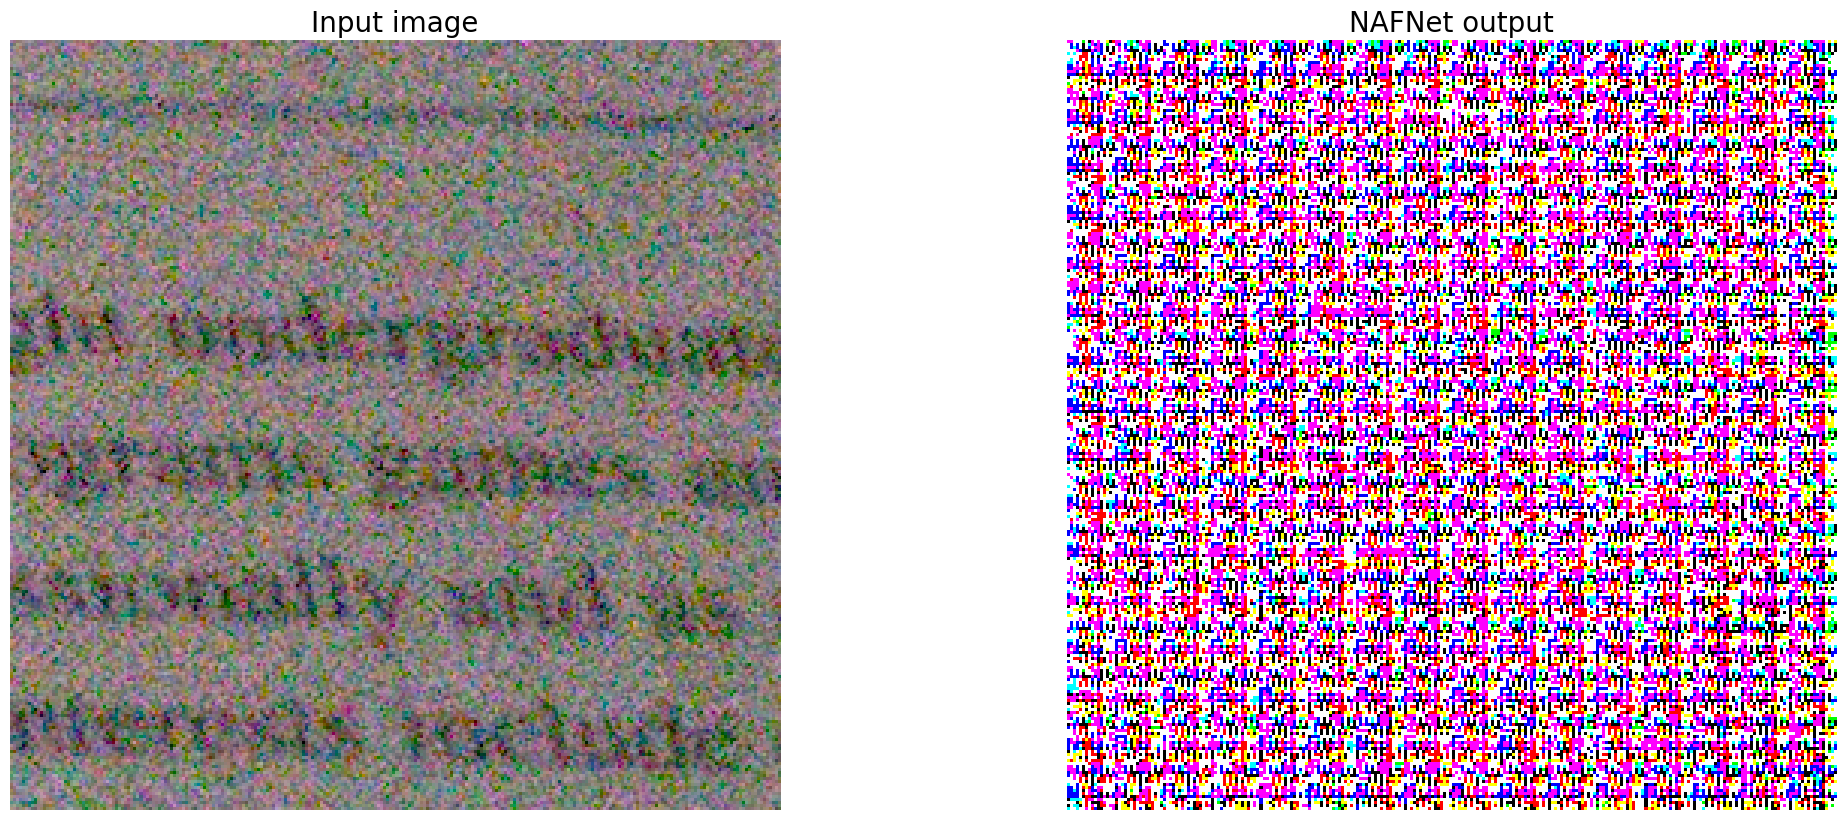

In [19]:
%cd /content/NAFNet

input_file = 'demo_input/noisy-demo-0.png'
output_file = 'demo_output/noisy-demo-0.png'

img_input = img_read (input_file)
inp = img_2tensor (img_input)
single_image_infer (NAFNet, inp, output_file)
img_output = img_read (output_file)
display_img (img_input, img_output)

# Deblur

In [16]:
%cd /content/NAFNet

opt_path = 'options/test/REDS/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
opt['num_gpu'] = 0 # For CPU mode instead of NVIDIA
NAFNet = create_model(opt)

/content/NAFNet
 load net keys <built-in method keys of dict object at 0x7aafea7e1040>


In [20]:
%cd /content/NAFNet

input_path = 'demo_input/blurry-reds-0.jpg'
output_path = 'demo_output/blurry-reds-0.jpg'

img_input = img_read(input_path)
inp = img_2tensor(img_input)
single_image_infer(NAFNet, inp, output_path)
img_output = img_read(output_path)
display_img (img_input, img_output)

Output hidden; open in https://colab.research.google.com to view.

# Super Resolution

In [23]:
opt_path = 'options/test/NAFSSR/NAFSSR-L_4x.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
opt['num_gpu'] = 0
NAFSSR = create_model(opt)

 load net keys <built-in method keys of dict object at 0x7ab0164a73c0>


In [ ]:
%cd /content/NAFNet

input_path_l = 'demo_input/Middlebury_lr_x4_sword2_l.png'
input_path_r = 'demo_input/Middlebury_lr_x4_sword2_r.png'
output_path = 'demo_output/Middlebury_sr_x4_sword2_{}.png'

img_l = img_read(input_path_l)
inp_l = img_2tensor(img_l)
img_r = img_read(input_path_r)
inp_r = img_2tensor(img_r)
stereo_image_infer (NAFSSR, inp_l, inp_r, output_path)
SR_l = img_read(output_path.format('L'))
SR_r = img_read(output_path.format('R'))
sr_display(img_l, img_r, SR_l, SR_r)